In [1]:
import os

# move to project root
while True:
    # get list of directories
    dirs = os.listdir()
    if "README.md" in dirs:
        break
    else:
        os.chdir("..")

# then move to feature extraction
os.chdir("feature_extraction")

print(os.getcwd())

/home/ra/Codes/timescales_filtering/feature_extraction


In [2]:
from utils import load_story_info
from hard_coded_things import featuresets_dict, train_stories, test_stories

import numpy as np

from tqdm.notebook import trange
from typing import Optional
from scipy.signal import periodogram

import matplotlib.pyplot as plt
import seaborn as sns

Using gpu


In [3]:
from config import config_plotting

In [4]:
config_plotting(context="paper", palette="muted")

In [5]:
# from scipy.interpolate import interp1d

# def upsampling(
#     story_data: np.ndarray,
#     word_presentation_times: np.ndarray,
#     new_sample_rate: float,
#     kind: Optional[str] = "linear",
# ):
#     # get new time array
#     new_times = np.arange(
#         word_presentation_times[0], word_presentation_times[-1], 1 / new_sample_rate
#     )

#     # get new data array
#     new_data = np.zeros((len(new_times), story_data.shape[1]))

#     # for each feature
#     for i in range(story_data.shape[1]):
#         f = interp1d(word_presentation_times, story_data[:, i], kind=kind)
#         # interpolate data
#         new_data[:, i] = f(new_times)

#     return new_data, new_times

In [6]:
# from scipy.interpolate import CubicSpline


# def upsampling_cubic(
#     story_data: np.ndarray, word_presentation_times: np.ndarray, new_sample_rate: float
# ):
#     # get new time array
#     new_times = np.arange(
#         word_presentation_times[0], word_presentation_times[-1], 1 / new_sample_rate
#     )

#     # get new data array
#     new_data = np.zeros((len(new_times), story_data.shape[1]))

#     # for each feature
#     for i in range(story_data.shape[1]):
#         spline = CubicSpline(word_presentation_times, story_data[:, i])
#         new_data[:, i] = spline(new_times)

#     return new_data, new_times

In [7]:
# # function computing the PSD of a time-series


# def compute_psd(
#     story_data: np.ndarray,
#     agg_method: str = "mean",
#     sampling_rate: float = 0.5,
#     fft_size: Optional[int] = None,
# ):
#     """
#     Compute the power spectral density of a time-series.

#     Args:
#     story_data (np.ndarray): The time-series data.
#     agg_method (str, optional): The method to aggregate the PSD. Defaults to "mean".
#     sampling_rate (float, optional): The sampling rate of the time-series. Defaults to 0.5.
#     fft_size (Optional[int], optional): The size of the FFT. Defaults to None.

#     Returns:
#     np.ndarray: The PSD of the time-series.
#     """
#     # get the number of samples
#     n_samples = story_data.shape[0]

#     # get the number of features
#     n_features = story_data.shape[1]

#     # if no FFT size is given
#     if fft_size is None:
#         # use the next power of 2
#         fft_size = 2 ** int(np.ceil(np.log2(n_samples)))

#     ps = []
#     for i in trange(n_features):
#         f, p = periodogram(story_data[:, i], fs=sampling_rate, nfft=fft_size)
#         ps.append(p)

#     psd = np.vstack(ps)

#     assert psd.shape[0] == n_features

#     if agg_method == "max":
#         psd = np.max(psd, axis=0)
#     elif agg_method == "min":
#         psd = np.min(psd, axis=0)
#     else:  # agg_method == 'mean':
#         psd = np.mean(psd, axis=0)

#     return {"f": f, "psd": psd}

In [8]:
# def upsample_story(
#     story_name: str,
#     is_bling: bool,
#     is_chinese: bool,
#     featureset_name: str = "mBERT_all",
#     new_sr: float = 20,
#     upsampling_method: str = "linear",
# ):
#     if is_bling:
#         if is_chinese:
#             # story_grid_dir = f"../data/bling/{subject_id}/txtgrids/zh"
#             story_grid_dir = f"../data/bling/COL/moth_grids/zh"
#             story_trfile_dir = f"../data/bling/COL/trfiles/zh"
#             # story_trfile_dir = f"../data/.archive/COL/trfiles/trfile_moth_COL_zh"
#         else:
#             # story_grid_dir = f"../data/bling/{subject_id}/moth_grids/en"
#             story_grid_dir = "../data/deniz2019/en/sentence_TextGrids"
#             story_trfile_dir = f"../data/bling/COL/trfiles/en"
#     else:
#         story_grid_dir = "../data/deniz2019/en/sentence_TextGrids"
#         story_trfile_dir = "../data/deniz2019/en/trfiles"

#     # story_grid_dir = f"../data/bling/{subject_id}/moth_grids/en"# load test_stories
#     story_data, word_presentation_times, tr_times, num_words_feature = load_story_info(
#         story_name=story_name,
#         featureset_name=featureset_name,
#         trfile_dir=story_trfile_dir,
#         grid_dir=story_grid_dir,
#     )

   
#     upsampled_story_data, new_times = upsampling(
#         story_data, word_presentation_times, new_sr, kind=upsampling_method
#     )

#     return {
#         "story_data": upsampled_story_data,
#         "word_presentation_times": new_times,
#         "sr": new_sr,
#     }

# Power Spectral Density

In [9]:
fft_size = 512
sr = 20
upsampling_method = "linear"
normalized_psd = True

is_bling = False
is_chinese = True

In [10]:
from signal_processing import compute_psd, upsample_story
from utils import get_dir

In [11]:
grid_dir, trfile_dir = get_dir(is_bling=False, is_chinese=False)

upsampled_en = upsample_story(
    test_stories[0], new_sr=sr, upsampling_method=upsampling_method, story_grid_dir=grid_dir, story_trfile_dir=trfile_dir, 
    featureset_name: str = "BERT_all",
)


load_grids_for_stories ['wheretheressmoke'] ../data/deniz2019/en/sentence_TextGrids
English text
Extracting embeddings from bert-base-multilingual-uncased using sentence split type. 171 input sequences.
story_data (1836, 9984)
word_presentation_times (1836,)


In [12]:
grid_dir, trfile_dir = get_dir(is_bling=True, is_chinese=False)

upsampled_en_mbert = upsample_story(
    test_stories[0],
    featureset_name="mBERT_all",
    new_sr=sr,
    upsampling_method=upsampling_method,
    story_grid_dir=grid_dir,
    story_trfile_dir=trfile_dir,
)

load_grids_for_stories ['wheretheressmoke'] ../data/deniz2019/en/sentence_TextGrids
English text
Extracting embeddings from bert-base-multilingual-uncased using sentence split type. 171 input sequences.
story_data (1836, 9984)
word_presentation_times (1836,)


In [13]:

grid_dir, trfile_dir = get_dir(is_bling=True, is_chinese=True)

upsampled_zh_mbert = upsample_story(
    test_stories[0],
    featureset_name="mBERT_all",
    new_sr=sr,
    upsampling_method=upsampling_method,
    story_grid_dir=grid_dir,
    story_trfile_dir=trfile_dir,
    
)

upsampled_zh_zhbert = upsample_story(
    test_stories[0],
    featureset_name="chinese_BERT_all",
    new_sr=sr,
    upsampling_method=upsampling_method,
    story_grid_dir=grid_dir,
    story_trfile_dir=trfile_dir,
)

load_grids_for_stories ['wheretheressmoke'] ../data/bling/COL/moth_grids/zh
Chinese text
Chinese sentence ends:  107
Extracting embeddings from bert-base-multilingual-uncased using sentence split type. 107 input sequences.
story_data (1742, 9984)
word_presentation_times (1742,)
load_grids_for_stories ['wheretheressmoke'] ../data/bling/COL/moth_grids/zh
Chinese text
Chinese sentence ends:  107
Extracting embeddings from bert-base-chinese using sentence split type. 107 input sequences.
story_data (1742, 9984)
word_presentation_times (1742,)


In [14]:
psd_en_m = compute_psd(
    upsampled_en_mbert["story_data"],
    sampling_rate=upsampled_en_mbert["sr"],
    fft_size=fft_size,
)

  0%|          | 0/9984 [00:00<?, ?it/s]

In [15]:
psd_en = compute_psd(
    upsampled_en["story_data"], sampling_rate=upsampled_en["sr"], fft_size=fft_size
)

  0%|          | 0/9984 [00:00<?, ?it/s]

In [16]:
psd_zh_m = compute_psd(
    upsampled_zh_mbert["story_data"],
    sampling_rate=upsampled_zh_mbert["sr"],
    fft_size=fft_size,
)

  0%|          | 0/9984 [00:00<?, ?it/s]

In [17]:
psd_zh_zh = compute_psd(
    upsampled_zh_zhbert["story_data"],
    sampling_rate=upsampled_zh_zhbert["sr"],
    fft_size=fft_size,
)

  0%|          | 0/9984 [00:00<?, ?it/s]

In [18]:
from typing import Dict, List


def plot_psds(
    first_psd: Dict,
    second_psd: Dict,
    ax=None,
    normalized: bool = False,
    labels: List[str] = ["first", "second"],
):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    first_max_val = 1
    second_max_val = 1

    if normalized:
        first_max_val = np.max(first_psd["psd"])
        second_max_val = np.max(second_psd["psd"])

    sns.lineplot(
        x=first_psd["f"][1:],
        y=first_psd["psd"][1:] / first_max_val,
        ax=ax,
        label=f"{labels[0]}",
    )
    sns.lineplot(
        x=second_psd["f"][1:],
        y=second_psd["psd"][1:] / second_max_val,
        ax=ax,
        label=f"{labels[1]}",
    )

    ax.set_xscale("log")

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power")

    plt.legend()
    plt.show()

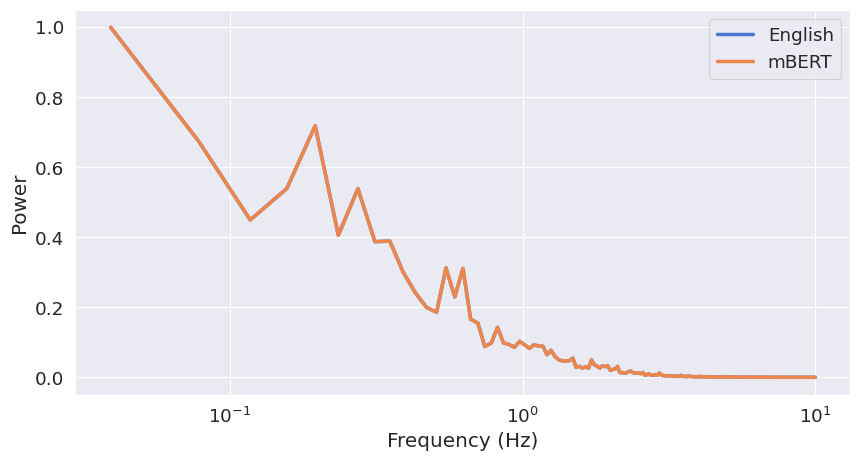

In [19]:
plot_psds(psd_en, psd_en_m, normalized=normalized_psd, labels=["English", "mBERT"])

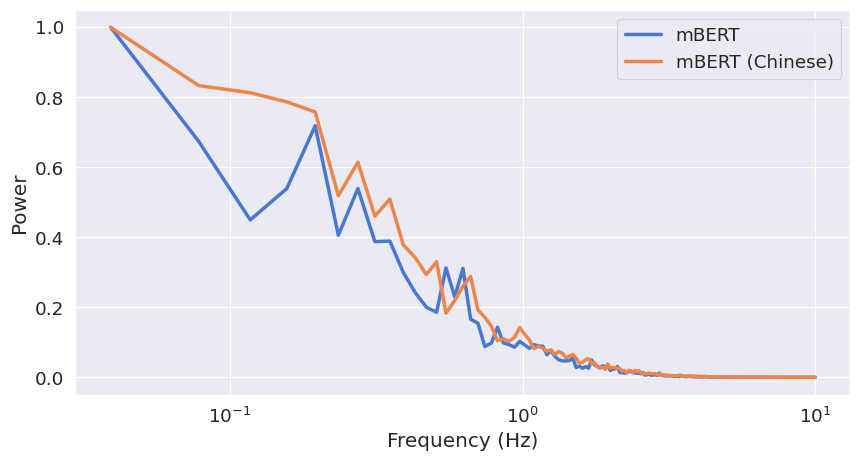

In [20]:
plot_psds(
    psd_en_m, psd_zh_m, normalized=normalized_psd, labels=["mBERT", "mBERT (Chinese)"]
)

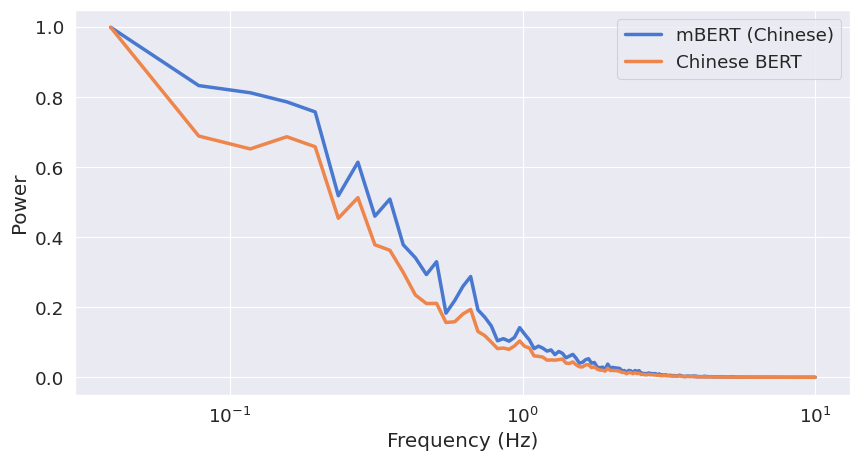

In [21]:
plot_psds(
    psd_zh_m,
    psd_zh_zh,
    normalized=normalized_psd,
    labels=["mBERT (Chinese)", "Chinese BERT"],
)